# 2. Заполнение и подготовка данных к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
data.columns = data.columns.str.lower()

In [8]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()

Меняю регистр букв в названии столбцов и в самх стобцах на нижний.

In [9]:
data['name'] = data['name'].str.replace('.', '')

C:\Users\ArchI\AppData\Local\Temp\ipykernel_13248\3613968232.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['name'] = data['name'].str.replace('.', '')


In [10]:
data.duplicated().sum()

0

Явных повторений нет.

In [11]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Преобразуем год релиза и оценки критиков в целочисленные значения, так как оценка критиков всегда целое число, а оценку пользователей во float.

In [13]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = data['user_score'].astype('float')

In [14]:
data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [15]:
data.groupby(['platform', 'genre']).agg(count=('name', 'count'))

count
platform genre              
2600     action           61
         adventure         2
         fighting          2
         misc              5
         platform          9
...                      ...
xone     role-playing     14
         shooter          38
         simulation        4
         sports           38
         strategy          3

[293 rows x 1 columns]

In [16]:
data[['critic_score', 'user_score']].corr()

,critic_score,user_score
critic_score,1.000000,0.580878
user_score,0.580878,1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

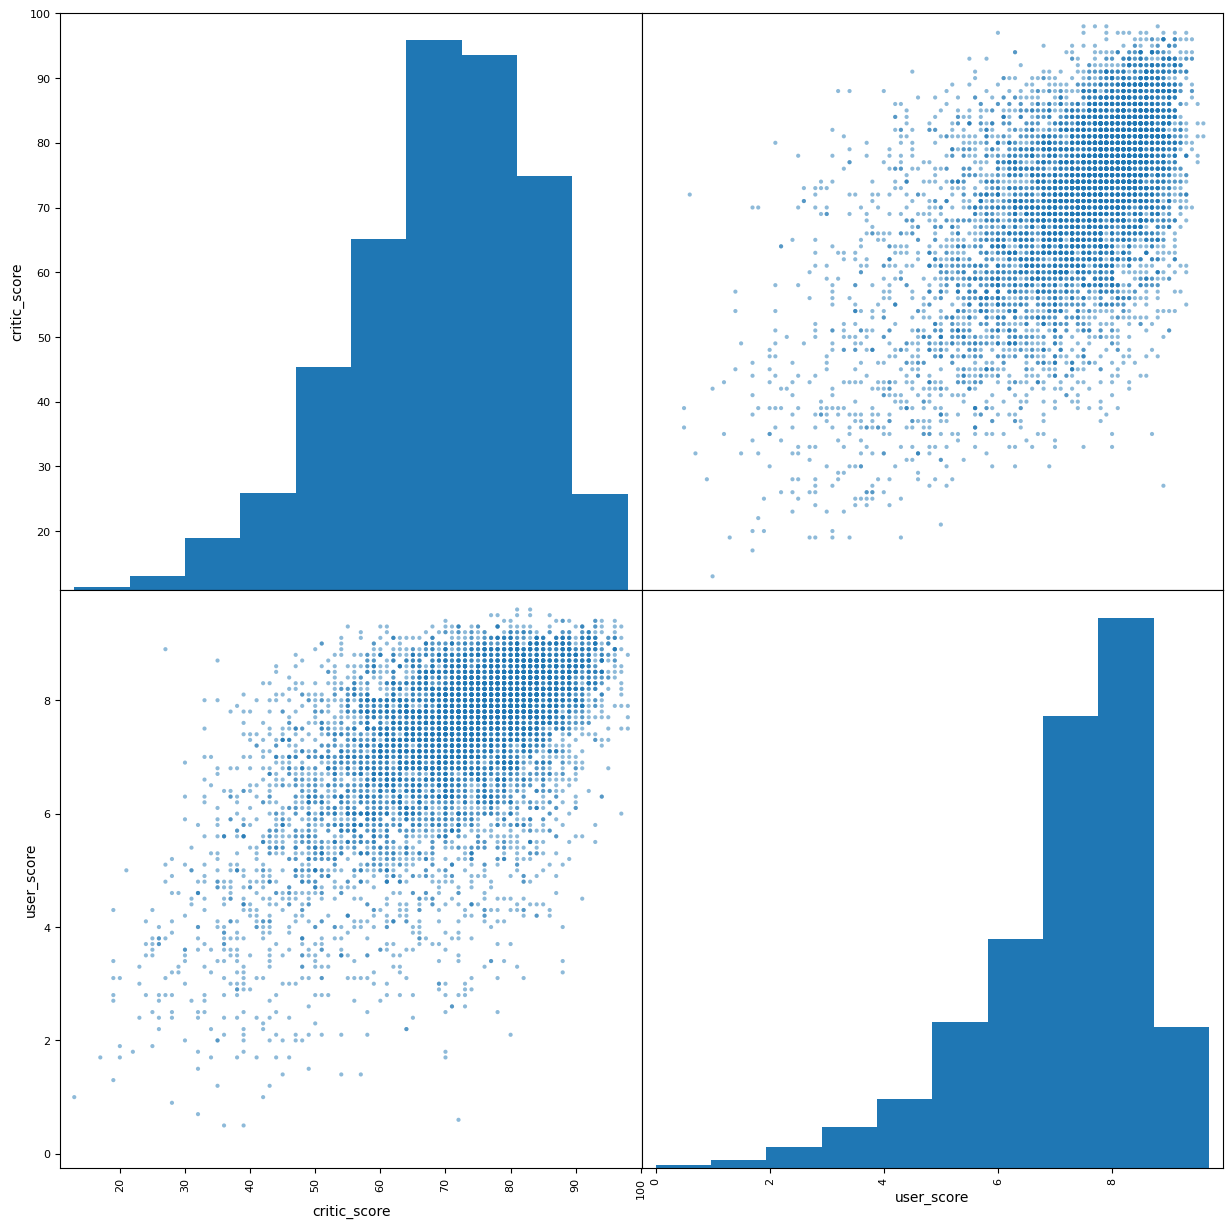

In [17]:
pd.plotting.scatter_matrix(data[['critic_score', 'user_score']], figsize=(15,15))

In [18]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94,8.5,e
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84,6.4,e
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74,7.9,e10+
475,wwe smackdown vs raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,<NA>,sports,0.01,0.00,0.00,0.00,43,NaN,e10+
16405,freaky flyers,gc,<NA>,racing,0.01,0.00,0.00,0.00,69,6.5,t
16448,inversion,pc,<NA>,shooter,0.01,0.00,0.00,0.00,59,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,<NA>,adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [19]:
game_without_date = data['name'][data['year_of_release'].isna()]
for game_ in game_without_date:
    for i in range (len(data['name'])):
        if ((game_ == data['name'][i]) and (pd.notna(data['year_of_release'][i]))):
            #data['year_of_release'].loc['name' == game_] = data['year_of_release'][i]
            data['year_of_release'].loc[data['name'] == game_] = data['year_of_release'][i]

In [20]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
627,rock band,x360,<NA>,misc,1.93,0.33,0.00,0.21,92,8.2,t
657,frogger's adventures: temple of the frog,gba,<NA>,adventure,2.15,0.18,0.00,0.07,73,NaN,e
805,rock band,wii,<NA>,misc,1.33,0.56,0.00,0.20,80,6.3,t
1142,rock band,ps3,<NA>,misc,0.99,0.41,0.00,0.22,92,8.4,t
...,...,...,...,...,...,...,...,...,...,...,...
16277,homeworld remastered collection,pc,<NA>,strategy,0.00,0.01,0.00,0.00,86,8.2,e10+
16288,shorts,ds,<NA>,platform,0.01,0.00,0.00,0.00,<NA>,NaN,e10+
16348,agarest senki: re-appearance,ps3,<NA>,role-playing,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16458,hakuouki: shinsengumi kitan,ps3,<NA>,adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Зачастую игры на разных платформах релизятся одновременно, поэтому я заполнил пропуски на основе предыдущих данных

In [21]:
game_without_date = data['name'][data['year_of_release'].isna()]
len(game_without_date)

146

In [22]:
new_df = pd.DataFrame({'name':[] ,'year':[] })
for game_ in game_without_date:
    if (game_.split()[-1].isdigit()) and (int(game_.split()[-1]) > 1900):
        new_df = new_df.append({'name': game_ , 'year': game_.split()[-1]},ignore_index=True)

In [23]:
new_df

,name,year
0,wwe smackdown vs raw 2006,2006
1,nfl gameday 2003,2003
2,all-star baseball 2005,2005
3,all-star baseball 2005,2005
4,tour de france 2011,2011
5,sega rally 2006,2006
6,football manager 2007,2007


Создаем датафрейм, который состояит из названия игры и года е релиза, который мы вычленили из названия игры, и где изначально не указан год релиза

In [24]:
for i in range(len(new_df['name'])):
    for j in range (len(data['name'])):
        if (new_df['name'][i] == data['name'][j]):
            data['year_of_release'][j] = int(new_df['year'][i])

После этого проходимся по всему датафрейму и заполняем пропуски на основании вычленых данных. Осталось 139 пропусков данных года релиза, как дальше заполнять не спарсив данные из интернета я не знаю.

In [25]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
data.dropna(subset=['year_of_release'],inplace = True,axis = 0 )

In [27]:
data.dropna(subset=['name'],inplace = True,axis = 0)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  Int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   Int64  
 9   user_score       7543 non-null   float64
 10  rating           9871 non-null   object 
 11  total_sales      16574 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


# 3.Исследовательский анализ данных

In [31]:
def create_bar(groupby_column, func, y='name'):
    df_to_plot = data.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize)
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize)

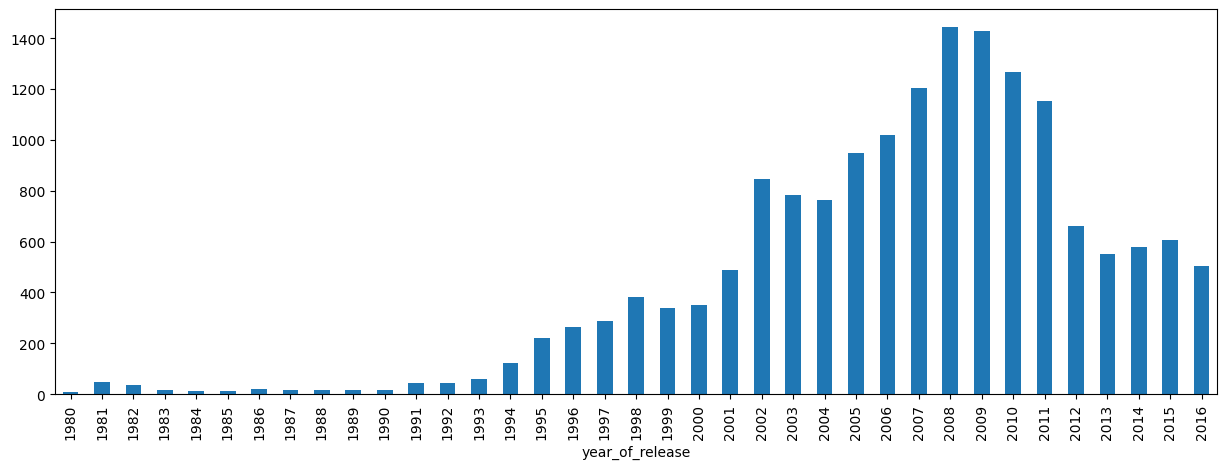

In [32]:
create_bar('year_of_release', 'count')

Первый резкий рост выпуска игр прошелся на 1994г. В 2001 был еще более резкий рост, думаю это связано в выходом самой популярной на сегодняшний день консоли ps2, а так же доступности домашнего пк и новой удобной операционки win xp.

In [33]:
top_platforms = data.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values(by='total_sales',ascending=False).head(5).index.tolist()

In [34]:
top_platforms

['ps2', 'x360', 'ps3', 'wii', 'ds']

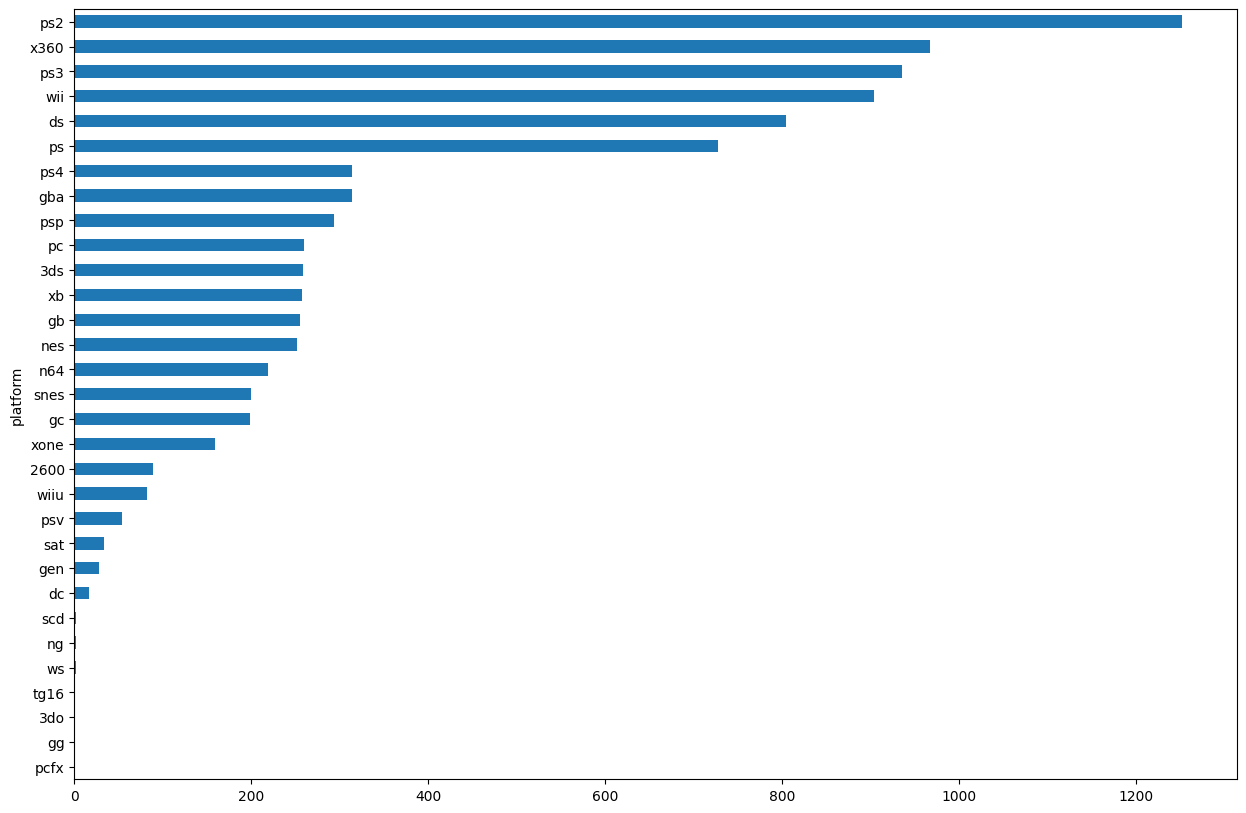

In [35]:
create_bar('platform', 'sum', 'total_sales')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  Int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   Int64  
 9   user_score       7543 non-null   float64
 10  rating           9871 non-null   object 
 11  total_sales      16574 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 2.2+ MB


In [37]:
def show_lines(data, year, title):
    
    plt.figure(figsize=(16,8))
    plt.title(title, fontsize=18)
    sns.lineplot(x='year_of_release',
                y='total_sales',
                hue='platform',
                markers=True,
                data=(data
                      .query('year_of_release >= @year')
                      .groupby(['platform','year_of_release'])['total_sales']   
                      .agg('sum')                                             
                      .reset_index()
                     )
                )

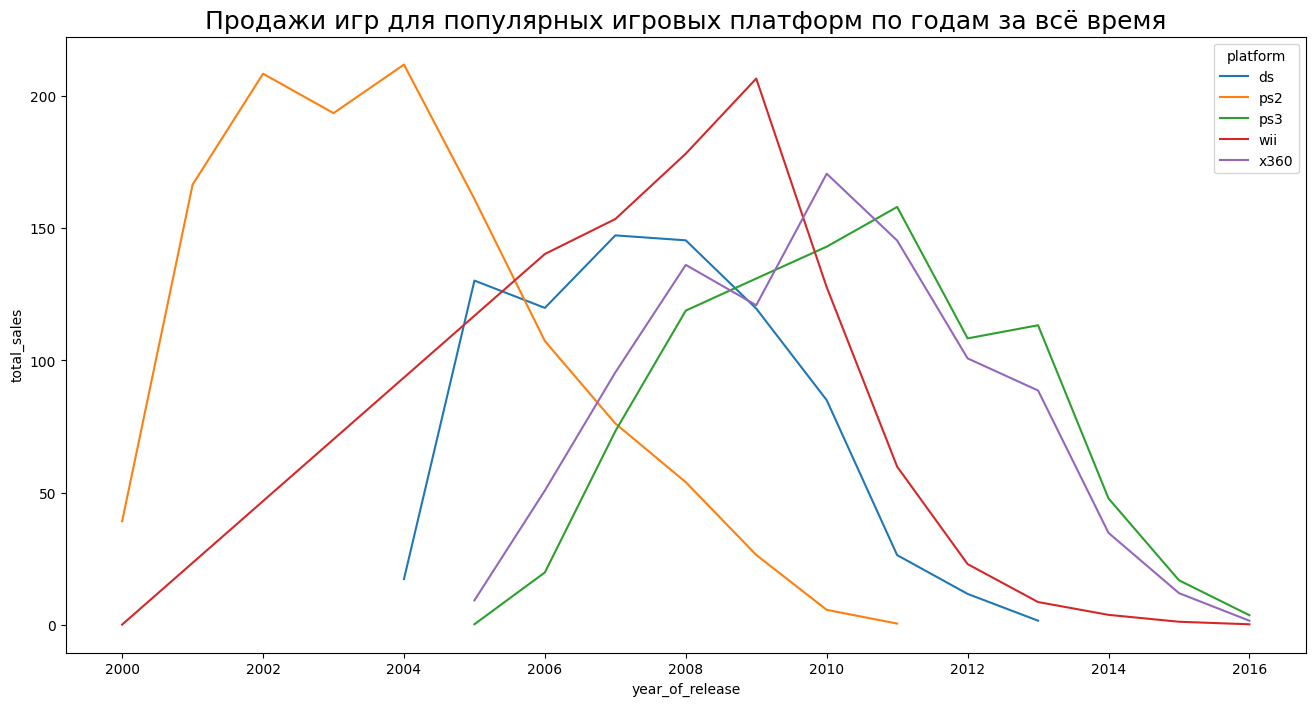

In [59]:
show_lines(data.query('platform in @top_platforms'), 
           2000, 
           'Продажи игр для популярных игровых платформ по годам за всё время')

In [41]:
data.loc[(data['platform'] == 'ds') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


In [42]:
data = data.drop(index=[15957])

Удаляем вброс с дс, так как она вышла в 2004 году. Активная поодержа платформ продожается около 6-8 лет. А прекращают жить примерно через 10 лет.

In [53]:
act_platforms = data['platform'].loc[data['year_of_release'] == 2016].unique()

In [54]:
act_platforms

array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'pc', 'x360', 'psv', 'wii'],
      dtype=object)

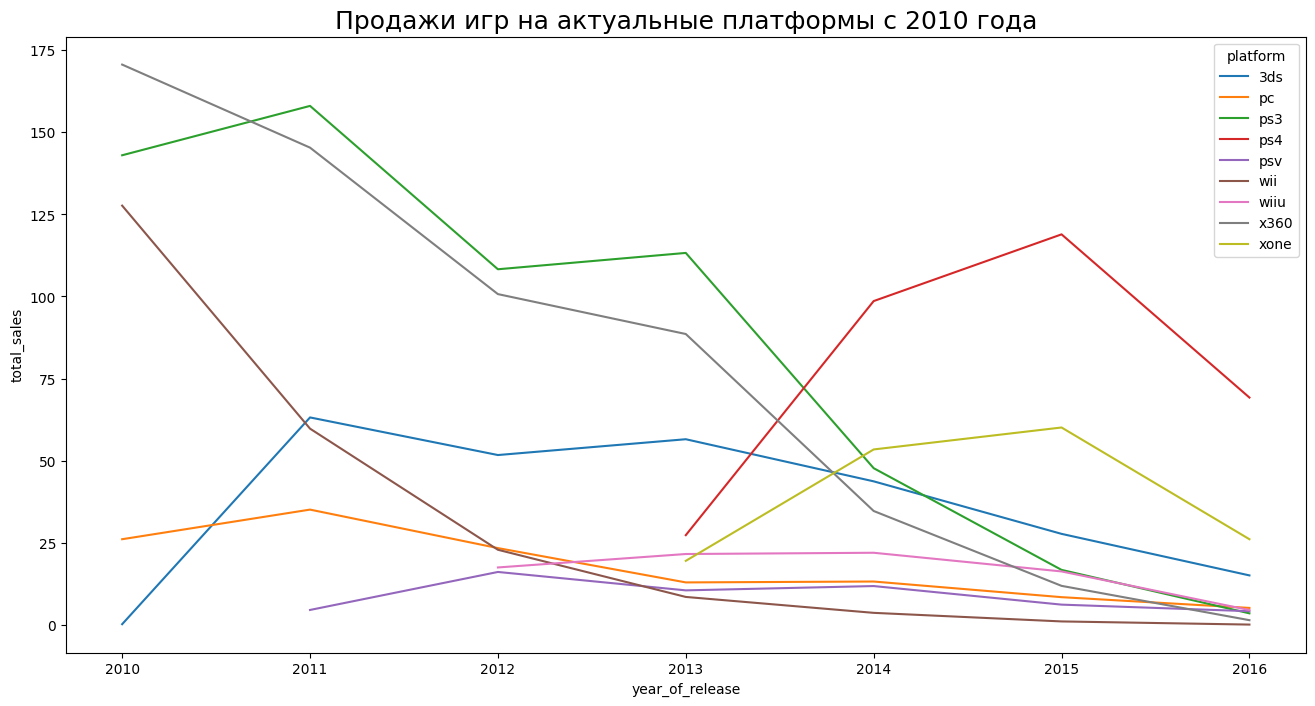

In [60]:
show_lines(data.query('platform in @act_platforms'), 
           2010, 
           'Продажи игр на актуальные платформы с 2010 года')

На 2013 год x360, ps3 и wii потеряли свою актульность, в следсвие выхода следующего поколения консолей, так что делать ставку на рекламу игр на эти платформы не стоит. Хорошо себя показывают игры для xone и ps4, эти платформы должны быть прибыльными.

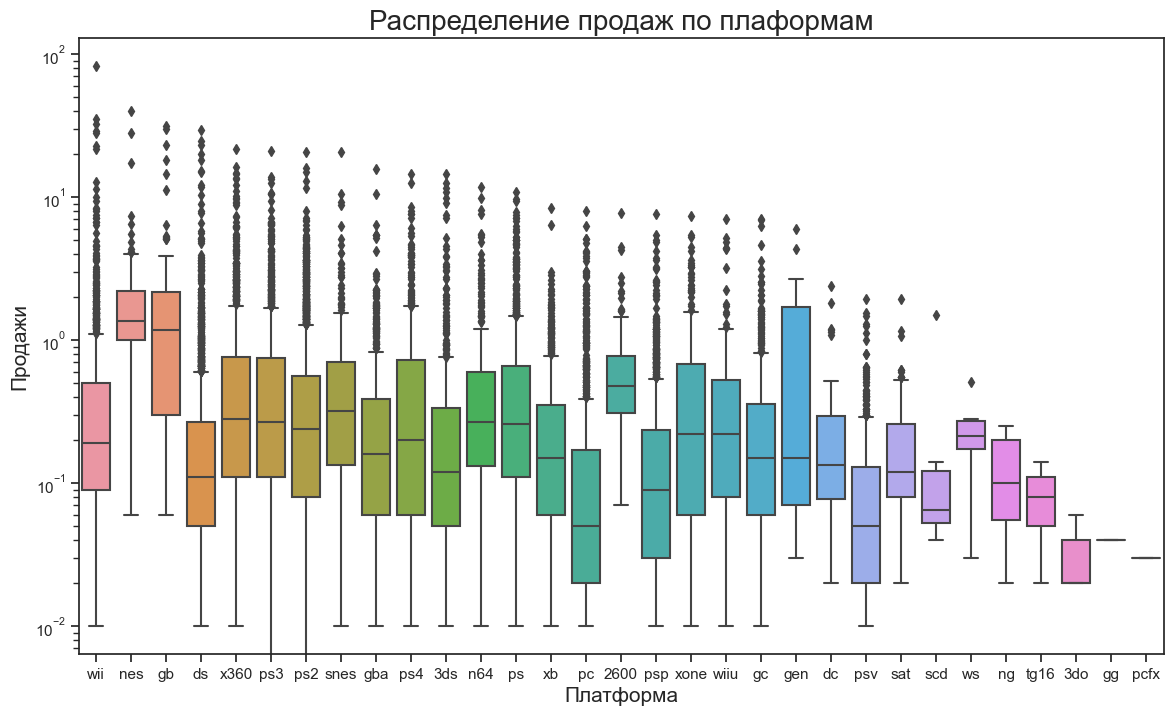

In [62]:
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=data, y="total_sales", x='platform')
ax.set_title('Распределение продаж по плаформам', fontsize=20)
ax.set_xlabel('Платформа', fontsize=15)
ax.set_ylabel('Продажи', fontsize=15)
ax.set(yscale='log')
plt.show()

1. Медианное значение у ps и n64 примерно одинаковое.
2. Очень много выбросов у pc, ds, wii и всех поколений ps, возможно это выстрелившие эксклюзивы.
3. Наименьшое медианное значение продаж у pc

In [75]:
ps4_games = data.loc[(data['platform'] == 'ps4') & (data['user_score'] > 0) & (data['critic_score'] > 0)]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

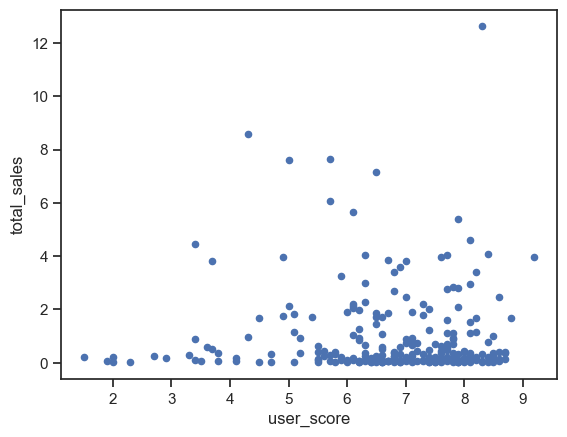

In [77]:
ps4_games.plot(y='total_sales', x='user_score', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

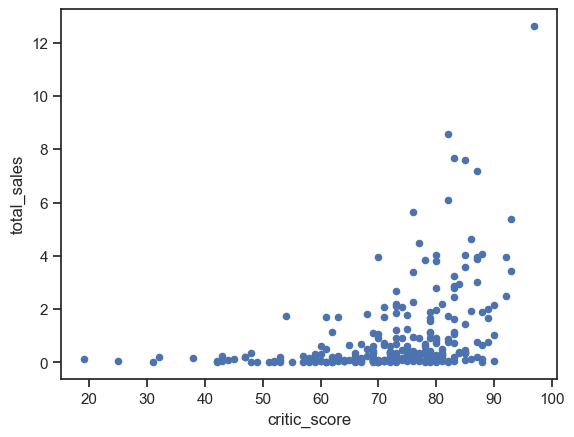

In [78]:
ps4_games.plot(y='total_sales', x='critic_score', kind='scatter')

По диаграмма видно, что хорошие оценки критиков способствуют увеличеию продаж, оценки пользователей тоже влияют на мнение о покупке игры, но не всегда, так как есть выбросы на средних оценках. Думаю это связано с менее объектывным мнением по поводу игры, нежели у критиков. 

In [79]:
ps4_games[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


Судя по анализу, можно сказать что корреляция между количеством продаж и оценкой пользователя нет вооюще, а между оценками критиков и количеством продаж, можно считать слабой.

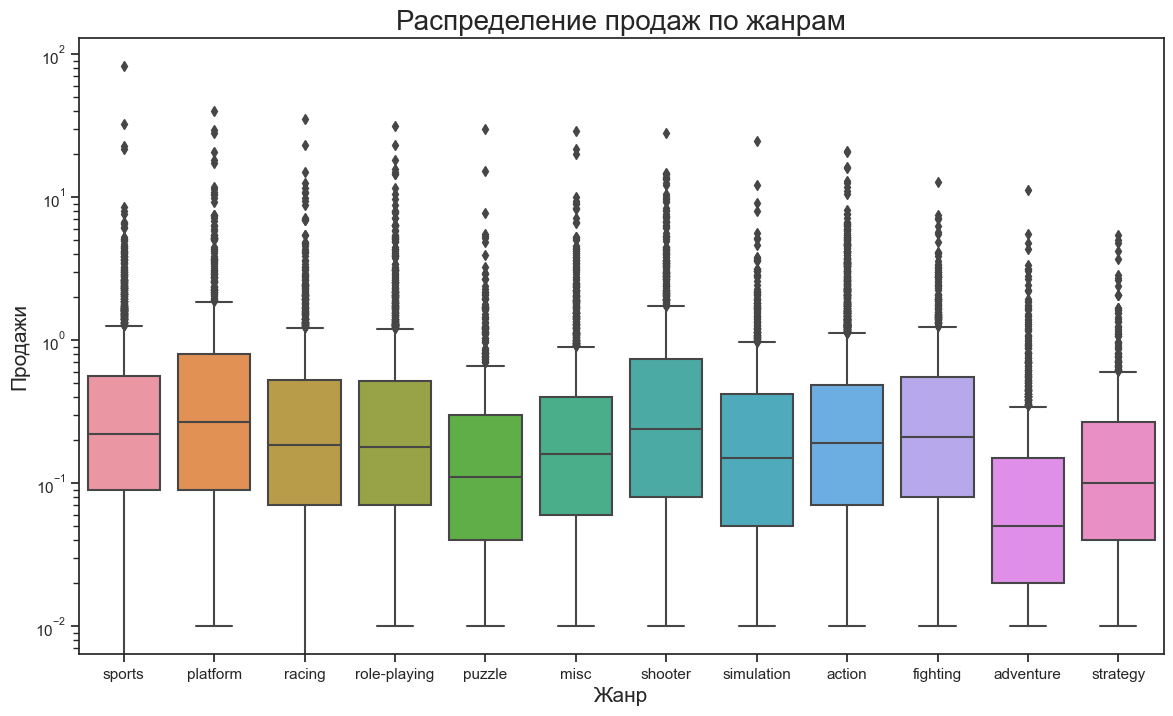

In [80]:
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=data, y="total_sales", x='genre')
ax.set_title('Распределение продаж по жанрам', fontsize=20)
ax.set_xlabel('Жанр', fontsize=15)
ax.set_ylabel('Продажи', fontsize=15)
ax.set(yscale='log')
plt.show()

Жанр приключений прям сильно выделяется из всех в отрицательном ключе. Самые же популярные это шутеры и платформеры.

# 3.Портреты пользователей

In [148]:
data_act = data[data['year_of_release'] >= 2015]

In [149]:
data_region = (data
                  .loc[data['year_of_release'] >= 2015]                     
                  .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']] 
                  .agg('sum') 
                 )                                                           
data_region

,na_sales,eu_sales,jp_sales
platform,,,
3ds,10.31,7.39,23.55
pc,3.72,9.10,0.00
ps3,5.66,7.30,4.97
ps4,63.86,83.54,12.05
psp,0.00,0.00,0.12
psv,0.54,1.08,8.41
wii,0.49,0.73,0.00
wiiu,8.86,6.49,4.12
x360,8.05,4.21,0.00


In [150]:
data_region['na_sales'].sort_values(ascending=False).head()

platform
ps4     63.86
xone    50.30
3ds     10.31
wiiu     8.86
x360     8.05
Name: na_sales, dtype: float64

Топ 5 платформ Америки

In [151]:
data_region['eu_sales'].sort_values(ascending=False).head()

platform
ps4     83.54
xone    28.10
pc       9.10
3ds      7.39
ps3      7.30
Name: eu_sales, dtype: float64

Топ 5 платформ Европы

In [152]:
data_region['jp_sales'].sort_values(ascending=False).head()

platform
3ds     23.55
ps4     12.05
psv      8.41
ps3      4.97
wiiu     4.12
Name: jp_sales, dtype: float64

Топ 5 платформ Японии

In [153]:
def graph (df, region, name, axes):
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

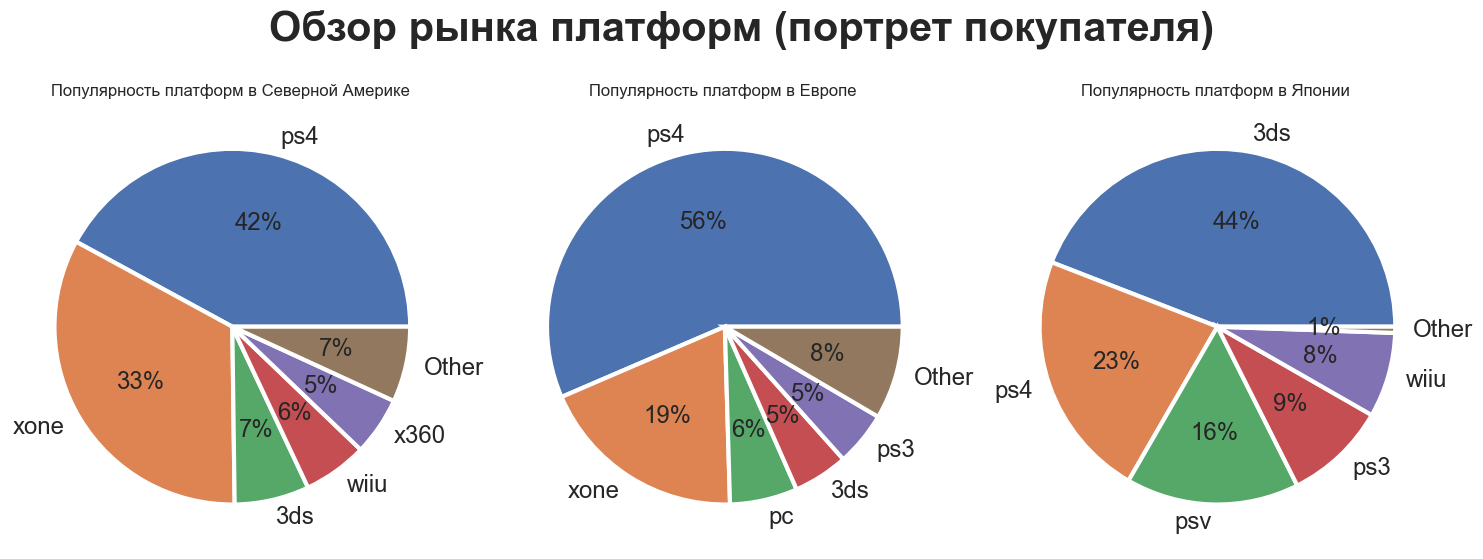

In [154]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(data_act, 'na_sales', 'Северной Америке', axes[0])
graph(data_act, 'eu_sales', 'Европе', axes[1])
graph(data_act, 'jp_sales', 'Японии', axes[2])

В америке и европе предпочтения схожи, все предпочитают в основном стационарные платформы, то есть играют дома. В японии же наоборот, большинство продаж выпадают на портативные консоли, тем самым показывая, что японцы предпочитают играть вне дома. В данном случае, я беру данные от 2015 года, так это время смены поколения консолей, и это надо учитывать для дальшейшей рекламной компании, а вот для дальнейшего исследования, возьму период с 2010 года, так как вкусы в жанре и реакцию на возрастную оценку не думаю что изменились, а большая выборка данных даст более коррекстное понимание ситуации по дальнейшим категориям.

In [156]:
data_act = data[data['year_of_release'] >= 2010]

In [93]:
data_region = (data
                  .loc[data['year_of_release'] >= 2010]                     
                  .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']] 
                  .agg('sum') 
                 )                                                           
data_region

,na_sales,eu_sales,jp_sales
genre,,,
action,294.26,236.70,72.21
adventure,20.84,18.88,15.67
fighting,39.05,20.33,13.90
misc,122.67,66.15,24.54
platform,54.90,38.30,15.81
puzzle,9.65,6.60,3.40
racing,46.11,54.79,6.68
role-playing,112.05,75.48,103.59
shooter,238.50,172.57,14.05


In [101]:
data_region['na_sales'].sort_values(ascending=False).head()

genre
action          294.26
shooter         238.50
sports          157.49
misc            122.67
role-playing    112.05
Name: na_sales, dtype: float64

Топ 5 жанров Америки

In [102]:
data_region['eu_sales'].sort_values(ascending=False).head()

genre
action          236.70
shooter         172.57
sports          117.03
role-playing     75.48
misc             66.15
Name: eu_sales, dtype: float64

Топ 5 жанров Европы

In [103]:
data_region['jp_sales'].sort_values(ascending=False).head()

genre
role-playing    103.59
action           72.21
misc             24.54
platform         15.81
adventure        15.67
Name: jp_sales, dtype: float64

Топ 5 жанров Японии

In [121]:
def graph_genre (df, region, name, axes):
    
    sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'genre': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['genre', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.genre,
               
               legend=False, 
               title = f"Популярность жанров игр в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

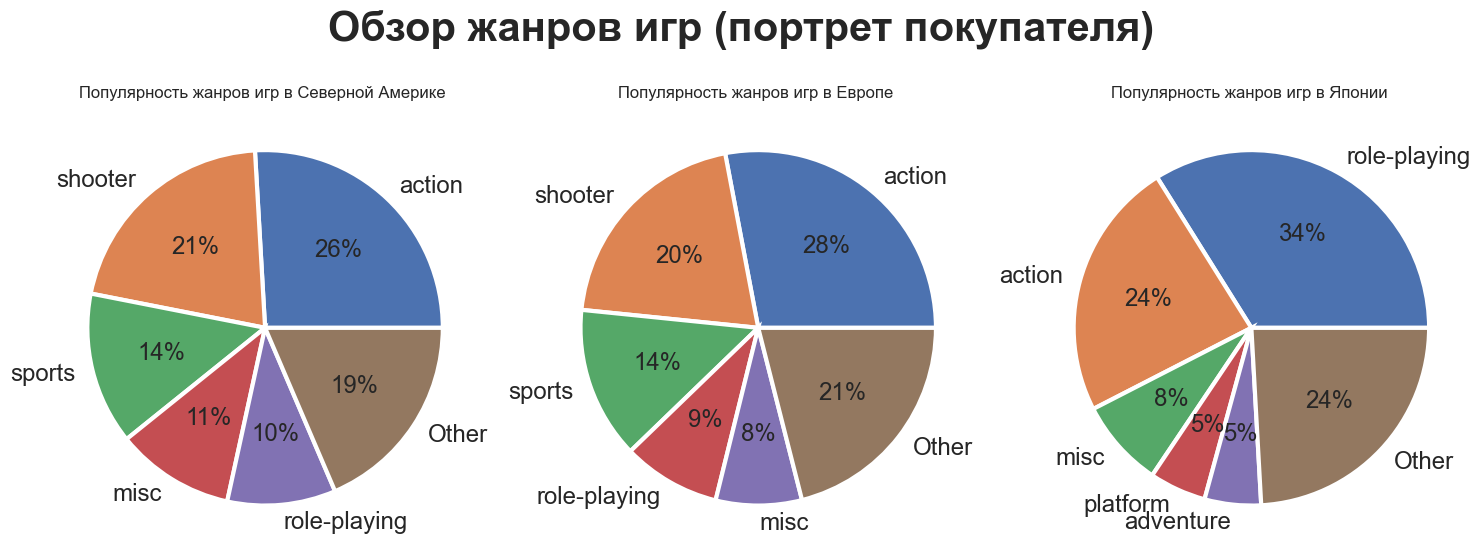

In [131]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор жанров игр (портрет покупателя)', fontsize = 30, fontweight='bold')

graph_genre(data_act, 'na_sales', 'Северной Америке', axes[0])
graph_genre(data_act, 'eu_sales', 'Европе', axes[1])
graph_genre(data_act, 'jp_sales', 'Японии', axes[2])

Как и в предпочтениях по платформам, так и по жанрам, американци и европейцы схожи во вкусах, когда как японцы, это совсем другой мир. В японии больше любят ролевые игры, Хотя экшн игры любят все.

In [157]:
data_region_genre = (data
                  .loc[data['year_of_release'] >= 2010]                     
                  .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]    
                  .agg('sum')                                                           
                 )                                                          
data_region_genre.dropna()

,na_sales,eu_sales,jp_sales
rating,,,
e,271.21,197.52,47.87
e10+,161.61,101.16,13.22
ec,1.13,0.00,0.00
m,384.23,294.29,30.47
rp,0.00,0.03,0.00
t,161.21,113.29,42.14


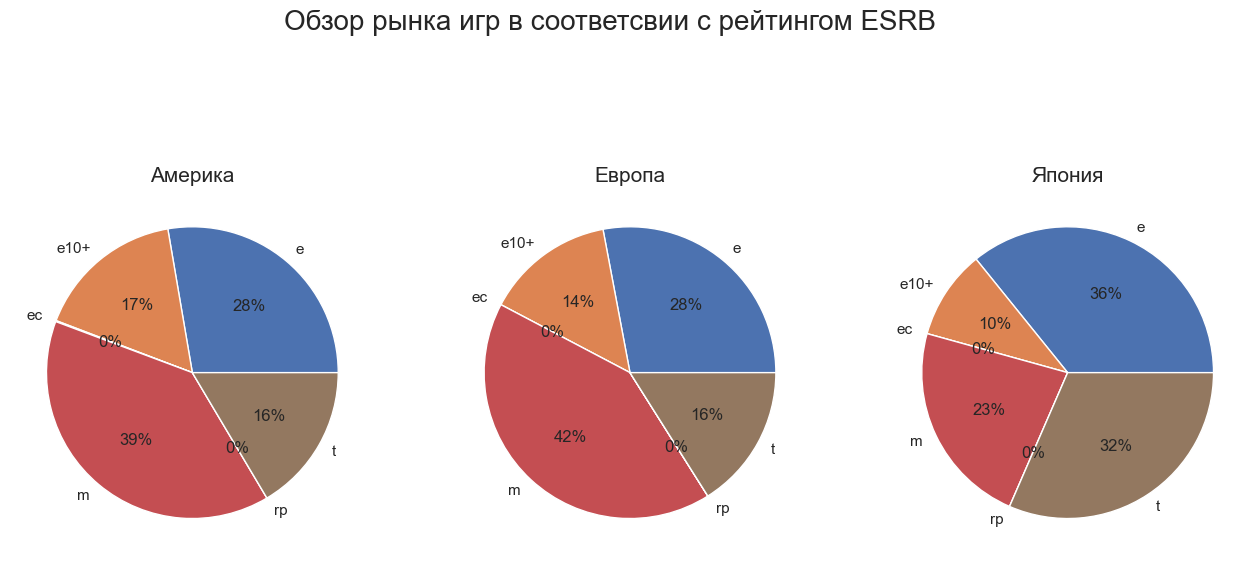

In [158]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Обзор рынка игр в соответсвии с рейтингом ESRB', fontsize=20, y=1.1)

ax1 = plt.subplot(131)
plt.pie(data_region_genre['na_sales'],autopct='%1.0f%%', labels=data_region_genre.index, normalize=True)
ax1.set_title('Америка', fontsize=15)

ax2 = plt.subplot(132)
plt.pie(data_region_genre['eu_sales'], autopct='%1.0f%%', labels=data_region_genre.index, normalize=True)
ax2.set_title('Европа', fontsize=15)

ax3 = plt.subplot(133)
plt.pie(data_region_genre['jp_sales'], autopct='%1.0f%%', labels=data_region_genre.index, normalize=True)
ax3.set_title('Япония', fontsize=15)
plt.show()

Как и в двух пердыдущих выводах, Европа и Америка схожи, япония отдельный мир. Европа и Сша предпочитают болеевзрослый контент игр, когда Японский рынок завоевон игрыми подходящим для более младшего поколения.

# 5.Проверка гипотез

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная: Средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые

In [184]:
data_droped = data.dropna(subset=['user_score'])
xone_rating = list(data_droped['user_score'].loc[data_droped['platform'] == 'xone'])
pc_rating = list(data_droped['user_score'].loc[(data_droped['platform'] == 'pc') & (data_droped['year_of_release'] >=2013)])
alpha = .05 

results = st.ttest_ind(xone_rating, pc_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.15503167687396294
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Альтернаятивная гипотеза:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [185]:
xone_rating = list(data_droped['user_score'].loc[data_droped['genre'] == 'action'])
pc_rating = list(data_droped['user_score'].loc[data_droped['genre'] == 'sports'])
alpha = .05 

results = st.ttest_ind(xone_rating, pc_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.09015945713902983
Отвергаем нулевую гипотезу


# 5.Общий вывод

Основная задача, это сделать рекламную компанию, рассмотрим несколько случаев:
1. Магазин представлен только на европейском/американском или только на этих двух рынках. Тогда мы деалем одну рекламную компанию игр в основном на обе консоли актульного поколения. По жанрам это будут Экшн игры и шутеры.
2. Магазин представлен на всех трех рынках и рекламная компания одна. Тогда Жанр Экшен остается приоритетным, а платформы, в идеале мультиплатформенные игры с 3дс и пс4, но пс остается все равно в приоритете.
3. Идеальная ситуация, 2 рекламные компании в двух регионах, тогда первая рекламная компания остается неизменной, а втораябудет направлена на мобильные консоли, с экшен и рпг игрыми.